<a href="https://colab.research.google.com/github/TiffanyDegbotse/SHAP_Tutorial/blob/main/SHAP_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# SHAP (SHapley Additive exPlanations) Tutorial with California Housing

This notebook provides a step-by-step introduction to using SHAP for explainable AI.  
We will cover:

1. What SHAP is and why it matters.  
2. Installing and importing SHAP.  
3. Training a simple machine learning model.  
4. Using SHAP to interpret model predictions.  
5. Visualizing SHAP explanations.




## 1. What is SHAP?

SHAP (Shapley Additive Explanations) is a method based on Shapley values from cooperative game theory.  
It explains the prediction of any machine learning model by assigning each feature an importance value for a particular prediction.

**Key advantages of SHAP:**
- **Model-agnostic**: works with any model (tree-based, linear, neural networks, etc.).  
- **Fair attribution**: distributes contributions among features fairly.  
- **Consistent explanations**: if a feature contributes more to the model, SHAP ensures it has a higher attribution.  

In simple terms, SHAP helps us answer:  
“How much did each feature contribute to this prediction?”


In [2]:

# Install shap
!pip install shap scikit-learn matplotlib


In [3]:

import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor



## 2. Load Dataset

We will use the **California Housing dataset**.  
The goal is to predict house prices based on features such as median income, average rooms, population, etc.


In [4]:

# Load California Housing dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,5.017657,1.006421,2300.0,3.691814,32.71,-117.03
8267,3.8125,49.0,4.473545,1.041005,1314.0,1.738095,33.77,-118.16
17445,4.1563,4.0,5.645833,0.985119,915.0,2.723214,34.66,-120.48
14265,1.9425,36.0,4.002817,1.033803,1418.0,3.994366,32.69,-117.11
2271,3.5542,43.0,6.268421,1.134211,874.0,2.300000,36.78,-119.80



## 3. Train a Model

We train a **Random Forest Regressor** as our black-box model.  
The goal is not accuracy here, but to demonstrate SHAP's interpretability.


In [5]:

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("Model trained successfully!")


Model trained successfully!



## 4. SHAP Explanations

We use `TreeExplainer` (optimized for tree-based models like Random Forest, XGBoost, LightGBM).  
This will compute SHAP values for the test dataset.

You will notice we used a smaller sample for the demonstration in this notebok. This is because SHAP gets more computationally expensive, the larger the dataset and hence takes more time to run


In [6]:
# Use a smaller sample to speed up SHAP
X_sample = X_test.sample(200, random_state=42)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)

print("SHAP values calculated!")


SHAP values calculated!



### Global Interpretability: SHAP Summary Plot

The summary plot shows:  
- Which features are most important overall.  
- How their values (high/low) impact predictions (red = high value, blue = low value).  


## Understanding the SHAP Summary Plot

The SHAP summary plot (also called a beeswarm plot) shows how each feature contributes to the model’s predictions in our sample dataset. Each point represents a single observation.

### Axes
- **Y-axis (features):** The features are listed in order of importance (top = most important).
- **X-axis (SHAP value):** The effect of the feature on the prediction.
  - **Positive SHAP values** → push predictions higher.
  - **Negative SHAP values** → push predictions lower.

### Color
The color of each point encodes the actual feature value:
- **Red = high feature value**
- **Blue = low feature value**

### Interpretation
- **MedInc (Median Income):** High income (red) strongly increases the prediction, while low income (blue) decreases it.  
- **Latitude & Longitude:** Location strongly influences the model. Higher latitudes (north) push predictions down, while lower latitudes push them up.  
- **AveOccup (Average Occupancy):** Both high and low occupancy can shift predictions, as seen in the spread of values.  
- **HouseAge, AveRooms, AveBedrms, Population:** These have smaller impacts (points cluster closer to zero).  

### Key Takeaway
This plot tells us:
1. **Which features matter most** (sorted by average SHAP value magnitude).  
2. **How feature values influence predictions** (positive vs negative impact).  
3. **The direction of influence** (e.g., high median income raises predicted values).  


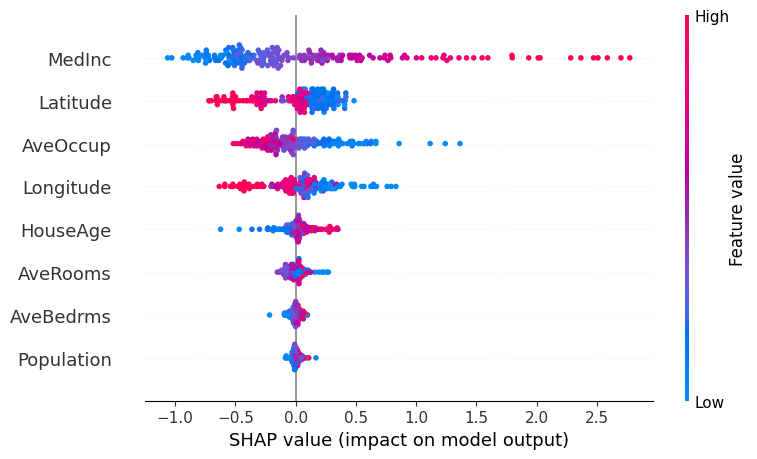

In [8]:
# Correct version
shap.summary_plot(shap_values, X_sample)



### Local Interpretability: SHAP Force Plot

We can also explain individual predictions.
The force plot shows how each feature pushes the prediction higher or lower compared to the average prediction.


## Understanding the SHAP Waterfall Plot

The SHAP waterfall plot explains how individual features contributed to **one single prediction** made by the model. It shows the step-by-step impact of each feature on the prediction, starting from the model’s baseline (expected value).

### Axes and Values
- **X-axis:** The prediction value f(x), starting from the baseline and moving step by step as each feature is added.  
- **Left labels:** Feature names along with their actual values in this instance (e.g., AveOccup = 1.885).  
- **Bars:** Contribution of each feature:  
  - **Red bars → Positive impact** (increase prediction).  
  - **Blue bars → Negative impact** (decrease prediction).  

### Key Numbers in the Plot
- **Baseline (E[f(X)] = 2.073):** The average model output if no feature values are considered.  
- **Final prediction (f(x) = 3.128):** The prediction for this specific sample after accounting for all feature contributions.  

### Feature Contributions
- **AveOccup = 1.885:** Increases prediction by **+0.86** (largest positive effect).  
- **MedInc = 2.821:** Decreases prediction by **–0.55** (largest negative effect).  
- **Latitude = 34.17:** Increases prediction by **+0.35**.  
- **Longitude = –118.38:** Increases prediction by **+0.17**.  
- **HouseAge = 33:** Small positive impact of **+0.10**.  
- **AveBedrms = 1.158:** Small positive impact of **+0.10**.  
- **AveRooms = 4.051:** Very small positive impact of **+0.04**.  
- **Population = 739:** Very small negative impact of **–0.01**.  

### Key Takeaway
The waterfall plot provides a local explanation for one prediction:
1. It starts with the baseline (average outcome).  
2. Adds or subtracts the effect of each feature (ordered by impact).  
3. Ends with the model’s final prediction for that sample.  

In this example, the largest driver was **high occupancy (AveOccup)** pushing the prediction upward, partially offset by **lower median income (MedInc)** which pulled the prediction down.


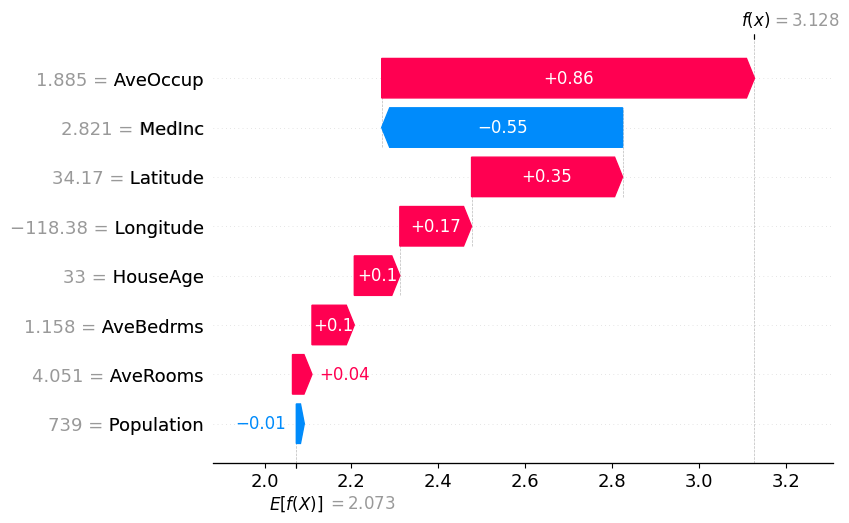

In [10]:
shap.plots.waterfall(shap.Explanation(values=shap_values[i],
                                      base_values=explainer.expected_value,
                                      data=X_sample.iloc[i,:],
                                      feature_names=X_sample.columns))



## 5. Conclusion

In this tutorial, we covered:
- What SHAP is and why it matters.  
- How to train a model and compute SHAP values.  
- How to visualize global and local feature contributions.  

SHAP is a powerful tool for making black-box models more transparent and trustworthy.
